# **Sales Prediction Using Python**
## *OASIS INFOBYTE - TASK 5*
## NAME : MOHAMED AFSAL

# *Statement of Problem*
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

 **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Loading data file
sales_df = pd.read_csv('/content/Advertising.csv')

In [ ]:
# To check total number of rows and columns
sales_df.shape

(200, 5)

In [ ]:
# To print first 5 rows of dataset
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# To check any null values
sales_df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
# To check any duplicate values
sales_df.duplicated().sum()

0

In [ ]:
# Drop the unnecessary columns
sales_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Importing libraries for Visualization**

In [ ]:
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline

In [ ]:
rate = sales_df.groupby('TV')[['Sales']].mean()
rate

,Sales
TV,
0.7,1.6
4.1,3.2
5.4,5.3
7.3,5.5
7.8,6.6
...,...
289.7,25.4
290.7,12.8
292.9,21.4


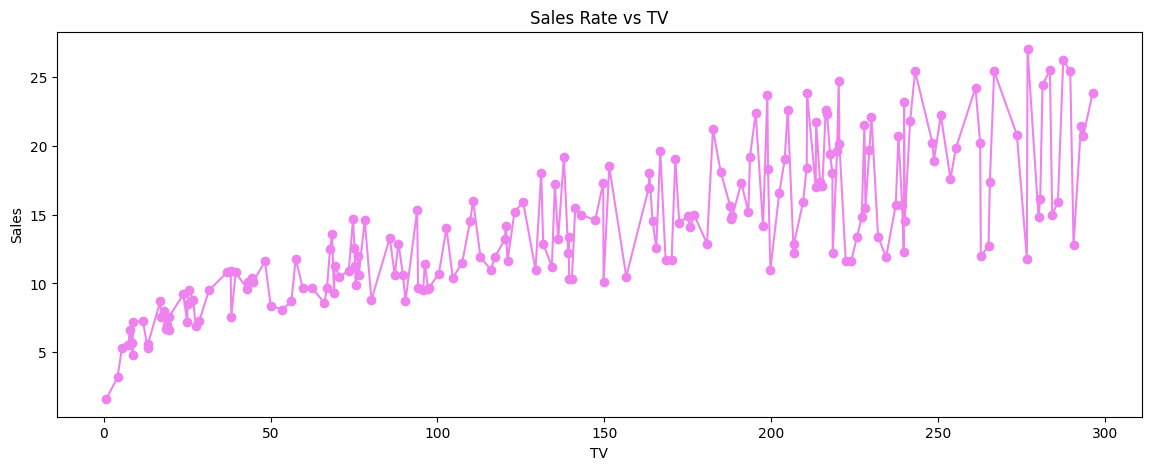

In [ ]:
# To plot a line graph
plt.figure(figsize= (14, 5))
plt.plot(rate.index, rate.Sales, color='violet', marker='o', ls='-')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title("Sales Rate vs TV");

In [ ]:
# let's try a different plot
px.scatter(sales_df,x='Radio',y='Sales',width=700,height=500,title='Sales Rate vs Radio')

In [ ]:
px.scatter(sales_df,x='Newspaper',y='Sales',width=700,height=500,title='Sales Rate vs Newspaper')

In [ ]:
# Seperating data
X = sales_df.drop('Sales',axis = 1)
y = sales_df['Sales']

In [ ]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [ ]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


**Splitting data into train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=43)

In [ ]:
print(X_train.shape)
print(y_test.shape)

(160, 3)
(40,)


In [ ]:
X_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
138,43.0,25.9,20.5
155,4.1,11.6,5.7
82,75.3,20.3,32.5
160,172.5,18.1,30.7
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [ ]:
y_train

116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
       ... 
58     23.8
21     12.5
49      9.7
64     18.0
68     18.9
Name: Sales, Length: 160, dtype: float64

In [ ]:
X_test

,TV,Radio,Newspaper
56,7.3,28.1,41.4
37,74.7,49.4,45.7
67,139.3,14.5,10.2
79,116.0,7.7,23.1
80,76.4,26.7,22.3
188,286.0,13.9,3.7
183,287.6,43.0,71.8
10,66.1,5.8,24.2
128,220.3,49.0,3.2
62,239.3,15.5,27.3


In [ ]:
y_test

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
Name: Sales, dtype: float64

**Training the model**

In [ ]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train_scaled = Sc.fit_transform(X_train)
X_test_scaled = Sc.fit_transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)
print("prediction{}".format(y_pred))

prediction[ 8.07208561 15.39694276 11.20723017  8.7231933  10.80138195 17.66036561
 23.785389    6.05064595 22.03934034 15.92229543  7.02529552 22.70917874
 18.68464752  4.38385522 14.34701329  9.2970207  11.08559493  9.15049517
 20.67810902  8.46853177 19.98026988 11.97879363 12.59404776  9.52303143
 15.73547183  7.12996739 20.52852873 19.92139498  8.37303394 13.40290607
 16.65207302 14.45505255 16.79013098 18.58218129 16.44742571 11.99347795
 12.08933433  5.31167661  9.13267146 12.38991849]


**Results of Prediction**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9222988021105912

Text(0, 0.5, 'Predicted values')

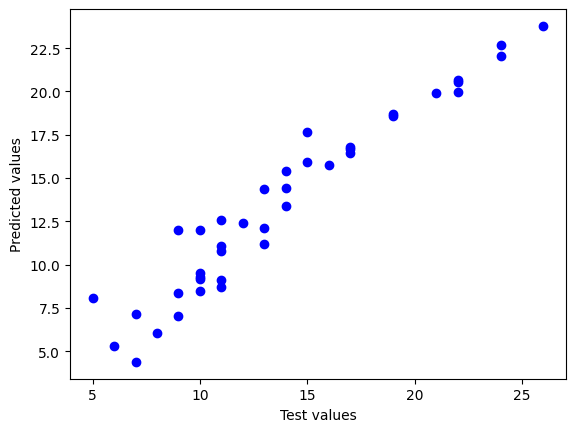

In [ ]:
plt.scatter(y_test, y_pred, c='b')
plt.xlabel('Test values')
plt.ylabel('Predicted values')